# Dimensionality Reduction and Visualisations

## import modules and configure notebook

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import swifter

%matplotlib inline
pd.set_option('max.rows', None)
pd.set_option('max.columns', None)

### configurations
* data_set -> string, 'all_train'|'test'|'superficial'|'bedrock', sets the dataset for visualisation
* save_plots -> boolean, if set to True then saves plots
* colour_by -> string, any categorical feature name, the datapoints will be coloured by the values of the feature in visualisations

In [2]:
data_set = 'all_train'
save_plots = False
colour_by = 'class'

### datasets required for the specified visualisations are loaded

In [3]:
if data_set == 'all_train':
    %store -r train_data
    %store -r tsne_df_train

    data = train_data
    tsne_data = tsne_df_train
    title = 't-SNE Analysis of Bedrock and Superficial Sample Data'
    
    
if data_set == 'bedrock':
    %store -r train_data
    %store -r PC_df_bedrock_train
    %store -r tsne_df_bedrock_train
    
    data = train_data[train_data['Geology'] == 'Bedrock']
    tsne_data = tsne_df_bedrock_train
    title = 't-SNE Analysis of Bedrock Sample Data'
    
if data_set == 'superficial':
    %store -r train_data
    %store -r tsne_df_superficial_train
    
    data = train_data[train_data['Geology'] == 'Superficial'].reset_index(drop = True)
    tsne_data = tsne_df_superficial_train
    title = 't-SNE Analysis of Superficial Sample Data'
    
if data_set == 'test':
    %store -r test_data
    %store -r tsne_df_test
    
    data = test_data.reset_index(drop = True)
    data['class'] = 1
    tsne_data = tsne_df_test
    title = 't-SNE of Artefact Data'

### static tSNE plots

### column that will colour the datapoints is appended to the dataset

In [4]:
tsne_data_with_colour = pd.concat([tsne_data, pd.Series(data['class'])], axis = 1)

In [36]:
import string as st


### visualise t-SNE in two dimensions


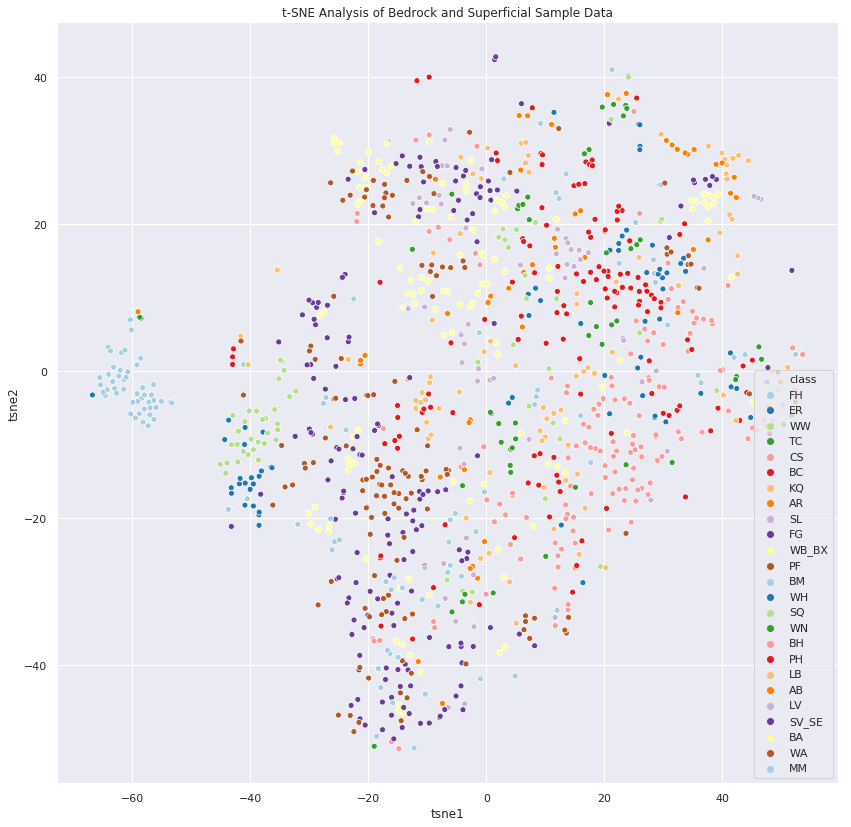

In [52]:
sns.set(rc={'figure.figsize':(14,14)})
#sns.palplot(sns.color_palette("husl", 8))
if data_set != 'test':
    plot_on_x = 'tsne1'
    plot_on_y = 'tsne2'

    sns.scatterplot(data = tsne_data_with_colour, x = plot_on_x, y = plot_on_y, hue=colour_by,
                    palette=sns.color_palette("Paired", 25)
                   )
    plt.title(title)

    if save_plots == True:
        fig = plot.get_figure()
        fig.savefig(fname='figures/2d_tSNE_{0}_bedrock'.format(colour_by))

In [6]:
sns.set(rc={'figure.figsize':(14,14)})
if data_set == 'test':
    plot_on_x = 'tsne1'
    plot_on_y = 'tsne2'

    sns.scatterplot(data = tsne_data_with_colour, x = plot_on_x, y = plot_on_y, legend = False)
    plt.title(title)

    if save_plots == True:
        fig = plot.get_figure()
        fig.savefig(fname='figures/2d_tSNE_{0}_bedrock'.format(colour_by))

In [ ]:
tsne_data_with_colour.to_csv('output_datasets/tsne_data_with_color.csv')